In [87]:
import uproot
import numpy as np
import pandas as pd
import math
import matplotlib.pyplot as plt
import numpy as np
import sys, os

import matplotlib.pyplot as plt
from matplotlib.ticker import MaxNLocator
from matplotlib.colors import ListedColormap, LinearSegmentedColormap, BoundaryNorm
from matplotlib.collections import LineCollection
from matplotlib import cm

## Define Function for Invariant Mass,SumPT

In [133]:
def M(pt1,eta1,phi1,m1,pt2,eta2,phi2,m2):
    px1, py1, pz1 = pt1*np.cos(phi1), pt1*np.sin(phi1),pt1*np.sinh(eta1)
    e1 = np.sqrt(m1**2 + px1**2 + py1**2 + pz1**2)
    px2, py2, pz2 = pt2*np.cos(phi2), pt2*np.sin(phi2), pt2*np.sinh(eta2)
    e2 = np.sqrt(m2**2 + px2**2 + py2**2 + pz2**2)
    
    return np.sqrt((e1+e2)**2-(px1+px2)**2-(py1+py2)**2-(pz1+pz2)**2)
def SumPT(pt1,phi1,pt2,phi2):
    px1, py1 = pt1*np.cos(phi1), pt1*np.sin(phi1)
    px2, py2,= pt2*np.cos(phi2), pt2*np.sin(phi2)
    
    return np.sqrt((px1+px2)**2+(py1+py2)**2)
def Sum3PT(pt1,phi1,pt2,phi2,pt3,phi3):
    px1, py1 = pt1*np.cos(phi1), pt1*np.sin(phi1)
    px2, py2,= pt2*np.cos(phi2), pt2*np.sin(phi2)
    px3, py3,= pt3*np.cos(phi3), pt3*np.sin(phi3)
    return np.sqrt((px1+px2+px3)**2+(py1+py2+py3)**2)
def Sum4PT(pt1,phi1,pt2,phi2,pt3,phi3,pt4,phi4):
    px1, py1 = pt1*np.cos(phi1), pt1*np.sin(phi1)
    px2, py2,= pt2*np.cos(phi2), pt2*np.sin(phi2)
    px3, py3,= pt3*np.cos(phi3), pt3*np.sin(phi3)
    px4, py4,= pt4*np.cos(phi4), pt4*np.sin(phi4)
    return np.sqrt((px1+px2+px3+px4)**2+(py1+py2+py3+px4)**2)

## Define Function for Delta phi

In [249]:
def dPhi(phi1,phi2):
    if abs(phi1-phi2) < math.pi:
     return abs(phi1-phi2)
    else:
     return 2*math.pi-abs(phi1-phi2)

## Fill information in to NumpyArray

In [120]:
class BranchGenParticles:
    def __init__(self,file):
        self.file = file
        self.length = len(file["Particle.Status"].array())
        self.Status = file["Particle.Status"].array()
        self.PID = file["Particle.PID"].array()
        self.M1 = file["Particle.M1"].array()
        self.M2 = file["Particle.M2"].array()
        self.D1 = file["Particle.D1"].array()
        self.D2  = file["Particle.D2"].array()
        self.PT = file["Particle.PT"].array()
        self.Eta =  file["Particle.Eta"].array()
        self.Phi = file["Particle.Phi"].array()
        self.Mass = file["Particle.Mass"].array()
        self.Labels = ["Status", "PID" , "M1", "M2", "D1", "D2", "PT", "Eta", "Phi", "Mass"]
        
    def Status_At(self, i):
        return self.Status[i]
    def PID_At(self, i):
        return self.PID[i]
    def M1_At(self, i):
        return self.M1[i]
    def M2_At(self, i):
        return self.M2[i]
    def D1_At(self, i):
        return self.D1[i]
    def D2_At(self, i):
        return self.D2[i]
    def PT_At(self, i):
        return self.PT[i]
    def Eta_At(self, i):
        return self.Eta[i]
    def Phi_At(self, i):
        return self.Phi[i]
    def Mass_At(self, i):
        return self.Mass[i]
    
class BranchJet:
    def __init__(self,file):
        self.file = file
        self.length = len(file["Jet.PT"].array())
        self.PT = file["Jet.PT"].array()
        self.Eta =  file["Jet.Eta"].array()
        self.Phi = file["Jet.Phi"].array()
        self.Mass = file["Jet.Mass"].array()
        
    def PT_At(self, i):
        return self.PT[i]
    def Eta_At(self, i):
        return self.Eta[i]
    def Phi_At(self, i):
        return self.Phi[i]
    def Mass_At(self, i):
        return self.Mass[i]
    def y_At(self, i):
        pT=self.PT[i]
        eta=self.Eta[i]
        pz=pT*np.sinh(eta)
        m=self.Mass[i]
        E=np.sqrt(m*m+pz*pz+pT*pT)
        
        return np.log((E+pz)/np.sqrt(m*m+pT*pT))
class BranchElectron:
    def __init__(self,file):
        self.file = file
        self.length = len(file["Electron.PT"].array())
        self.PT = file["Electron.PT"].array()
        self.Eta =  file["Electron.Eta"].array()
        self.Phi = file["Electron.Phi"].array()
        self.Charge = file["Electron.Charge"].array()
        self.Particle = file["Electron.Particle"].array()
    
    def PT_At(self, i):
        return self.PT[i]
    def Eta_At(self, i):
        return self.Eta[i]
    def Phi_At(self, i):
        return self.Phi[i]
    def Charge_At(self, i):
        return self.Charge[i]
    def Particle_At(self, i):
        return self.Particle[i]
    
class BranchMuon:
    def __init__(self,file):
        self.file = file
        self.length = len(file["Muon.PT"].array())
        self.PT = file["Muon.PT"].array()
        self.Eta =  file["Muon.Eta"].array()
        self.Phi = file["Muon.Phi"].array()
        self.Charge = file["Muon.Charge"].array()
        self.Particle = file["Muon.Particle"].array()
    
    def PT_At(self, i):
        return self.PT[i]
    def Eta_At(self, i):
        return self.Eta[i]
    def Phi_At(self, i):
        return self.Phi[i]
    def Charge_At(self, i):
        return self.Charge[i]
    def Particle_At(self, i):
        return self.Particle[i]

class BranchMissingET:
    def __init__(self,file):
        self.file = file
        self.length = len(file["MissingET.MET"].array())
        self.MET = file["MissingET.MET"].array()
        self.Eta =  file["MissingET.Eta"].array()
        self.Phi = file["MissingET.Phi"].array()
     
    
    def MET_At(self, i):
        return self.MET[i]
    def Eta_At(self, i):
        return self.Eta[i]
    def Phi_At(self, i):
        return self.Phi[i]
        
class Event_Weight:
    def __init__(self,file):
        self.file = file
        self.length = len(file["Event.Weight"].array())
        self.Event_Weight = np.array(file["Event.Weight"].array())
        
    def Event_Weight_At(self, i):
        return self.Event_Weight[i]

## define BDT function

In [278]:
def BDT(Jet,Electron,Muon,MissingET):
    mjj= []
    mll=[]
    dyjj=[]
    dPhijj=[]
    mT=[]
    sumC=[]
    sumM=[]
    pT_tot=[]
    survived_list = []
    Electron_Mass=0.511/1000
    Muon_Mass=105.66/1000
    for i in range(Jet.length):
        if len(Jet.PT_At(i)) < 2:
            continue
        if len(Electron.PT_At(i)) < 1:
            continue
        if len(Muon.PT_At(i)) < 1:
            continue
        
        mjj.append(M(Jet.PT_At(i)[0],Jet.Eta_At(i)[0],Jet.Phi_At(i)[0],Jet.Mass_At(i)[0],Jet.PT_At(i)[1],Jet.Eta_At(i)[1],Jet.Phi_At(i)[1],Jet.Mass_At(i)[1]))
        mll.append(M(Electron.PT_At(i)[0],Electron.Eta_At(i)[0],Electron.Phi_At(i)[0],Electron_Mass,Muon.PT_At(i)[0],Muon.Eta_At(i)[0],Muon.Phi_At(i)[0],Muon_Mass))
        dyjj.append(abs(Jet.y_At(i)[0]-Jet.y_At(i)[1]))
        dPhijj.append(dPhi(Jet.Phi_At(i)[0],Jet.Phi_At(i)[1]))
        
        PT_ll=SumPT(Electron.PT_At(i)[0],Electron.Phi_At(i)[0],Muon.PT_At(i)[0],Muon.Phi_At(i)[0])
        M_ll=M(Jet.PT_At(i)[0],Jet.Eta_At(i)[0],Jet.Phi_At(i)[0],Jet.Mass_At(i)[0],Jet.PT_At(i)[1],Jet.Eta_At(i)[1],Jet.Phi_At(i)[1],Jet.Mass_At(i)[1])
        ET_ll=np.sqrt(PT_ll*PT_ll+M_ll*M_ll)
        ET_tot=ET_ll+MissingET.MET_At(i)[0]
        PT_tot=Sum3PT(Electron.PT_At(i)[0],Electron.Phi_At(i)[0],Muon.PT_At(i)[0],Muon.Phi_At(i)[0],MissingET.MET_At(i)[0],MissingET.Phi_At(i)[0])
        mT.append(np.sqrt(ET_tot*ET_tot-PT_tot*PT_tot))
        
        C_e=abs(2*Electron.Eta_At(i)[0]-Jet.Eta_At(i)[0]-Jet.Eta_At(i)[1])
        C_mu=abs(2*Muon.Eta_At(i)[0]-Jet.Eta_At(i)[0]-Jet.Eta_At(i)[1])
        dEtajj=abs(Jet.Eta_At(i)[0]-Jet.Eta_At(i)[1])
        sumC.append((C_e+C_mu)/dEtajj)
        
        m_e_j1=M(Electron.PT_At(i)[0],Electron.Eta_At(i)[0],Electron.Phi_At(i)[0],Electron_Mass,Jet.PT_At(i)[0],Jet.Eta_At(i)[0],Jet.Phi_At(i)[0],Jet.Mass_At(i)[0])          
        m_e_j2=M(Electron.PT_At(i)[0],Electron.Eta_At(i)[0],Electron.Phi_At(i)[0],Electron_Mass,Jet.PT_At(i)[1],Jet.Eta_At(i)[1],Jet.Phi_At(i)[1],Jet.Mass_At(i)[1])        
        m_mu_j1=M(Muon.PT_At(i)[0],Muon.Eta_At(i)[0],Muon.Phi_At(i)[0],Muon_Mass,Jet.PT_At(i)[0],Jet.Eta_At(i)[0],Jet.Phi_At(i)[0],Jet.Mass_At(i)[0])   
        m_mu_j2=M(Muon.PT_At(i)[0],Muon.Eta_At(i)[0],Muon.Phi_At(i)[0],Muon_Mass,Jet.PT_At(i)[1],Jet.Eta_At(i)[1],Jet.Phi_At(i)[1],Jet.Mass_At(i)[1])                  
        sumM.append(m_e_j1+ m_e_j2+ m_mu_j1+ m_mu_j2)
        
        pT_tot.append(Sum4PT(Electron.PT_At(i)[0],Electron.Phi_At(i)[0],Muon.PT_At(i)[0],Muon.Phi_At(i)[0],Jet.PT_At(i)[0],Jet.Phi_At(i)[0],Jet.PT_At(i)[1],Jet.Phi_At(i)[1]))
        survived_list.append(i)

    print("There are {} events.".format(len(mjj)))
    
    return np.array(mjj), np.array(mll), np.array(dyjj), np.array(dPhijj),np.array(mT), np.array(sumC), np.array(sumM), np.array(pT_tot), np.array(survived_list)

## Import File

In [29]:
filepath_0 = "./ggh_pos1112.root"
filepath_03 = "./ggh_pos1314.root"
filepath_05 = "./vbf_pos1112.root"
filepath_1 = "./vbf_pos1314.root"

file_0 = uproot.open(filepath_0)["Delphes;1"]
file_03 = uproot.open(filepath_03)["Delphes;1"]
file_05 = uproot.open(filepath_05)["Delphes;1"]
file_1 = uproot.open(filepath_1)["Delphes;1"]

## Print the Branch in the Delphes

In [10]:
file_0.show()

Event                      TStreamerInfo              asdtype('>i4')
Event.fUniqueID            TStreamerBasicType         asjagged(asdtype('>u4'))
Event.fBits                TStreamerBasicType         asjagged(asdtype('>u4'))
Event.Number               TStreamerBasicType         asjagged(asdtype('>i8'))
Event.ReadTime             TStreamerBasicType         asjagged(asdtype('>f4'))
Event.ProcTime             TStreamerBasicType         asjagged(asdtype('>f4'))
Event.ProcessID            TStreamerBasicType         asjagged(asdtype('>i4'))
Event.MPI                  TStreamerBasicType         asjagged(asdtype('>i4'))
Event.Weight               TStreamerBasicType         asjagged(asdtype('>f4'))
Event.CrossSection         TStreamerBasicType         asjagged(asdtype('>f4'))
Event.CrossSectionError    TStreamerBasicType         asjagged(asdtype('>f4'))
Event.Scale                TStreamerBasicType         asjagged(asdtype('>f4'))
Event.AlphaQED             TStreamerBasicType         asjagged

## fill information to numpy array

In [271]:
GenParticle_0, Jet_0, Electron_0, Muon_0,MissingET_0, Event_Weight_0 = BranchGenParticles(file_0), BranchJet(file_0), BranchElectron(file_0), BranchMuon(file_0), BranchMissingET(file_0), Event_Weight(file_0) 
GenParticle_03, Jet_03, Electron_03, Muon_03,MissingET_03, Event_Weight_03 = BranchGenParticles(file_03), BranchJet(file_03), BranchElectron(file_03), BranchMuon(file_03), BranchMissingET(file_03), Event_Weight(file_03) 
GenParticle_05, Jet_05, Electron_05, Muon_05,MissingET_05, Event_Weight_05 = BranchGenParticles(file_05), BranchJet(file_05), BranchElectron(file_05), BranchMuon(file_05), BranchMissingET(file_05), Event_Weight(file_05) 
GenParticle_1, Jet_1, Electron_1, Muon_1,MissingET_1, Event_Weight_1 = BranchGenParticles(file_1), BranchJet(file_1), BranchElectron(file_1), BranchMuon(file_1), BranchMissingET(file_1), Event_Weight(file_1)

## Check the Event Shape

In [18]:
print(len(GenParticle_0.Status))
print(len(GenParticle_03.Status))
print(len(GenParticle_05.Status))
print(len(GenParticle_1.Status))
print(GenParticle_0.Status)

10000
10000
10000
10000
[[21 21 43 ... 1 1 1] [21 43 21 ... 1 1 1] [21 43 21 ... 1 1 1] ... [21 43 21 ... 1 1 1] [21 21 43 ... 1 1 1] [21 21 43 ... 1 1 1]]


## BDT

In [279]:
mjj_0,mll_0,dyjj_0,dPhijj_0,mT_0, sumC_0, sumM_0, pT_tot_0, survived_list_0 = BDT(Jet_0,Electron_0,Muon_0,MissingET_0)
mjj_03,mll_03,dyjj_03,dPhijj_03,mT_03, sumC_03, sumM_03, pT_tot_03, survived_list_03 = BDT(Jet_03,Electron_03,Muon_03,MissingET_03)
mjj_05,mll_05,dyjj_05,dPhijj_05,mT_05, sumC_05, sumM_05, pT_tot_05, survived_list_05 = BDT(Jet_05,Electron_05,Muon_05,MissingET_05)
mjj_1,mll_1,dyjj_1,dPhijj_1,mT_1, sumC_1, sumM_1, pT_tot_1, survived_list_1 = BDT(Jet_1,Electron_1,Muon_1,MissingET_1)

There are 942 events.
There are 928 events.
There are 3648 events.
There are 3606 events.


## histogram

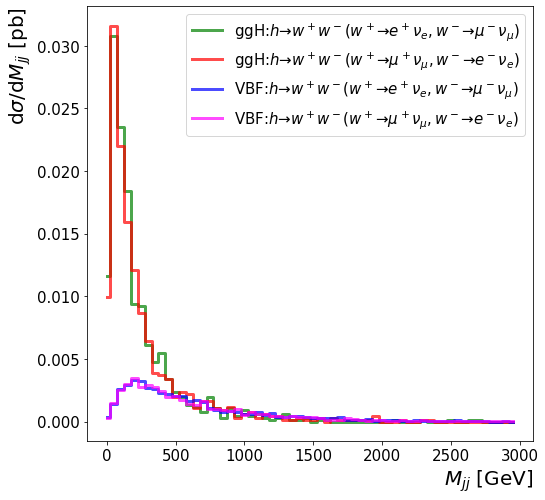

In [273]:
plt.figure(figsize=(8,8)) # plotsize

weight_0 = Event_Weight_0.Event_Weight[survived_list_0]/10000*37*1000
weight_03 = Event_Weight_03.Event_Weight[survived_list_03]/10000*37*1000
weight_05 = Event_Weight_05.Event_Weight[survived_list_05]/10000*37*1000
weight_1 = Event_Weight_1.Event_Weight[survived_list_1]/10000*37*1000

bin_size = np.linspace(0,3000,61)


hist_0, bins_0 = np.histogram(mjj_0, bins=bin_size, weights = weight_0)
plt.step(bins_0[:-1], hist_0.astype(np.float32)/50, color = "green", where='mid',linewidth=3, alpha=0.7,label="ggH:$h\\to w^+ w^-(w^+\\to e^+\\nu_e,w^-\\to\\mu^-\\nu_\\mu)$") 

hist_03, bins_03 = np.histogram(mjj_03, bins=bin_size, weights = weight_03)
plt.step(bins_03[:-1], hist_03.astype(np.float32)/50, color = "red", where='mid',linewidth=3, alpha=0.7,label="ggH:$h\\to w^+ w^-(w^+\\to \mu^+\\nu_\mu,w^-\\to e^-\\nu_e)$") 

hist_05, bins_05 = np.histogram(mjj_05, bins=bin_size, weights = weight_05)
plt.step(bins_05[:-1], hist_05.astype(np.float32)/50, color = "blue", where='mid',linewidth=3, alpha=0.7,label="VBF:$h\\to w^+ w^-(w^+\\to e^+\\nu_e,w^-\\to\\mu^-\\nu_\\mu)$") 

hist_1, bins_1 = np.histogram(mjj_1, bins=bin_size, weights = weight_1)
plt.step(bins_1[:-1], hist_1.astype(np.float32)/50, color = "magenta", where='mid',linewidth=3, alpha=0.7,label="VBF:$h\\to w^+ w^-(w^+\\to \\mu^+\\nu_\\mu,w^-\\to e^-\\nu_e)$") 



# plt.yscale('log') 
plt.xlabel("$M_{jj}$ [GeV]" , fontsize=20, horizontalalignment='right',x=1)  # plot x-axis label
plt.ylabel("d$\sigma$/d$M_{jj}$ [pb]", fontsize=20, horizontalalignment='right',y=1)  # plot y-axis label
plt.xticks(fontsize=15)   # set x-ticks size
plt.yticks(fontsize=15)   # set y-ticks size 
plt.legend(bbox_to_anchor=(1, 1),ncol=1,fontsize=15) # plot label tag
# plt.savefig("./invariant_mass_SVJ.png")  #save figure as png
plt.show()

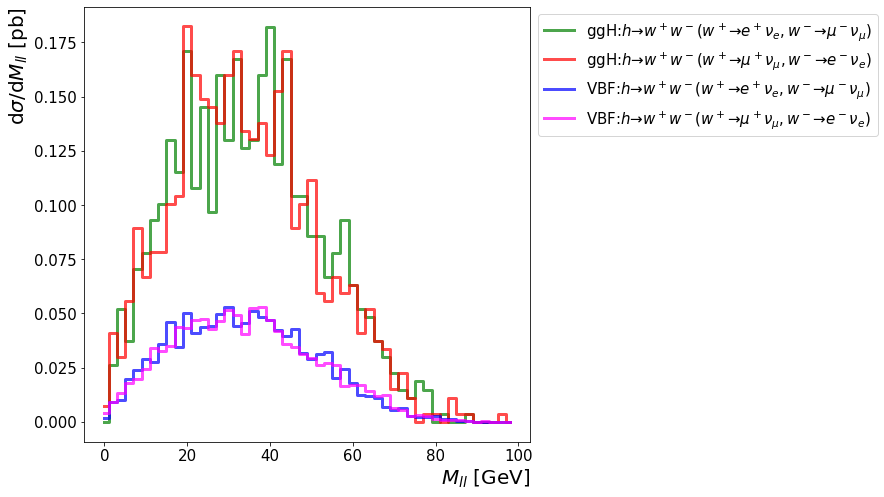

In [280]:
plt.figure(figsize=(8,8)) # plotsize

weight_0 = Event_Weight_0.Event_Weight[survived_list_0]/10000*37*1000
weight_03 = Event_Weight_03.Event_Weight[survived_list_03]/10000*37*1000
weight_05 = Event_Weight_05.Event_Weight[survived_list_05]/10000*37*1000
weight_1 = Event_Weight_1.Event_Weight[survived_list_1]/10000*37*1000

bin_size = np.linspace(0,100,51)


hist_0, bins_0 = np.histogram(mll_0, bins=bin_size, weights = weight_0)
plt.step(bins_0[:-1], hist_0.astype(np.float32)/2, color = "green", where='mid',linewidth=3, alpha=0.7,label="ggH:$h\\to w^+ w^-(w^+\\to e^+\\nu_e,w^-\\to\\mu^-\\nu_\\mu)$") 

hist_03, bins_03 = np.histogram(mll_03, bins=bin_size, weights = weight_03)
plt.step(bins_03[:-1], hist_03.astype(np.float32)/2, color = "red", where='mid',linewidth=3, alpha=0.7,label="ggH:$h\\to w^+ w^-(w^+\\to \mu^+\\nu_\mu,w^-\\to e^-\\nu_e)$") 

hist_05, bins_05 = np.histogram(mll_05, bins=bin_size, weights = weight_05)
plt.step(bins_05[:-1], hist_05.astype(np.float32)/2, color = "blue", where='mid',linewidth=3, alpha=0.7,label="VBF:$h\\to w^+ w^-(w^+\\to e^+\\nu_e,w^-\\to\\mu^-\\nu_\\mu)$") 

hist_1, bins_1 = np.histogram(mll_1, bins=bin_size, weights = weight_1)
plt.step(bins_1[:-1], hist_1.astype(np.float32)/2, color = "magenta", where='mid',linewidth=3, alpha=0.7,label="VBF:$h\\to w^+ w^-(w^+\\to \\mu^+\\nu_\\mu,w^-\\to e^-\\nu_e)$") 



# plt.yscale('log') 
plt.xlabel("$M_{ll}$ [GeV]" , fontsize=20, horizontalalignment='right',x=1)  # plot x-axis label
plt.ylabel("d$\sigma$/d$M_{ll}$ [pb]", fontsize=20, horizontalalignment='right',y=1)  # plot y-axis label
plt.xticks(fontsize=15)   # set x-ticks size
plt.yticks(fontsize=15)   # set y-ticks size 
plt.legend(bbox_to_anchor=(1, 1),ncol=1,fontsize=15) # plot label tag
# plt.savefig("./invariant_mass_SVJ.png")  #save figure as png
plt.show()

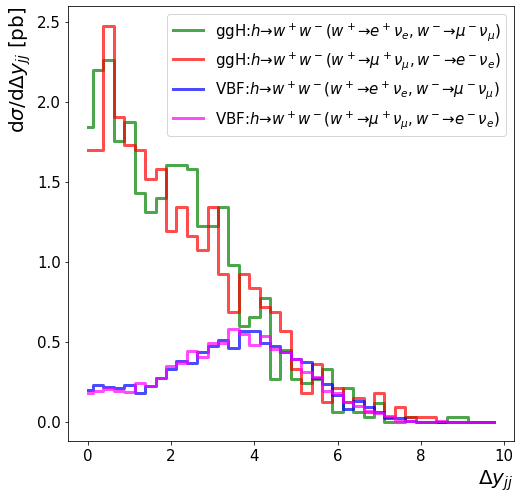

In [281]:
plt.figure(figsize=(8,8)) # plotsize

weight_0 = Event_Weight_0.Event_Weight[survived_list_0]/10000*37*1000
weight_03 = Event_Weight_03.Event_Weight[survived_list_03]/10000*37*1000
weight_05 = Event_Weight_05.Event_Weight[survived_list_05]/10000*37*1000
weight_1 = Event_Weight_1.Event_Weight[survived_list_1]/10000*37*1000

bin_size = np.linspace(0,10,41)


hist_0, bins_0 = np.histogram(dyjj_0, bins=bin_size, weights = weight_0)
plt.step(bins_0[:-1], hist_0.astype(np.float32)/0.25, color = "green", where='mid',linewidth=3, alpha=0.7,label="ggH:$h\\to w^+ w^-(w^+\\to e^+\\nu_e,w^-\\to\\mu^-\\nu_\\mu)$") 

hist_03, bins_03 = np.histogram(dyjj_03, bins=bin_size, weights = weight_03)
plt.step(bins_03[:-1], hist_03.astype(np.float32)/0.25, color = "red", where='mid',linewidth=3, alpha=0.7,label="ggH:$h\\to w^+ w^-(w^+\\to \mu^+\\nu_\mu,w^-\\to e^-\\nu_e)$") 

hist_05, bins_05 = np.histogram(dyjj_05, bins=bin_size, weights = weight_05)
plt.step(bins_05[:-1], hist_05.astype(np.float32)/0.25, color = "blue", where='mid',linewidth=3, alpha=0.7,label="VBF:$h\\to w^+ w^-(w^+\\to e^+\\nu_e,w^-\\to\\mu^-\\nu_\\mu)$") 

hist_1, bins_1 = np.histogram(dyjj_1, bins=bin_size, weights = weight_1)
plt.step(bins_1[:-1], hist_1.astype(np.float32)/0.25, color = "magenta", where='mid',linewidth=3, alpha=0.7,label="VBF:$h\\to w^+ w^-(w^+\\to \\mu^+\\nu_\\mu,w^-\\to e^-\\nu_e)$") 



# plt.yscale('log') 
plt.xlabel("$\Delta y_{jj}$ " , fontsize=20, horizontalalignment='right',x=1)  # plot x-axis label
plt.ylabel("d$\sigma$/d$\Delta y_{jj}$ [pb]", fontsize=20, horizontalalignment='right',y=1)  # plot y-axis label
plt.xticks(fontsize=15)   # set x-ticks size
plt.yticks(fontsize=15)   # set y-ticks size 
plt.legend(bbox_to_anchor=(1, 1),ncol=1,fontsize=15) # plot label tag
# plt.savefig("./invariant_mass_SVJ.png")  #save figure as png
plt.show()

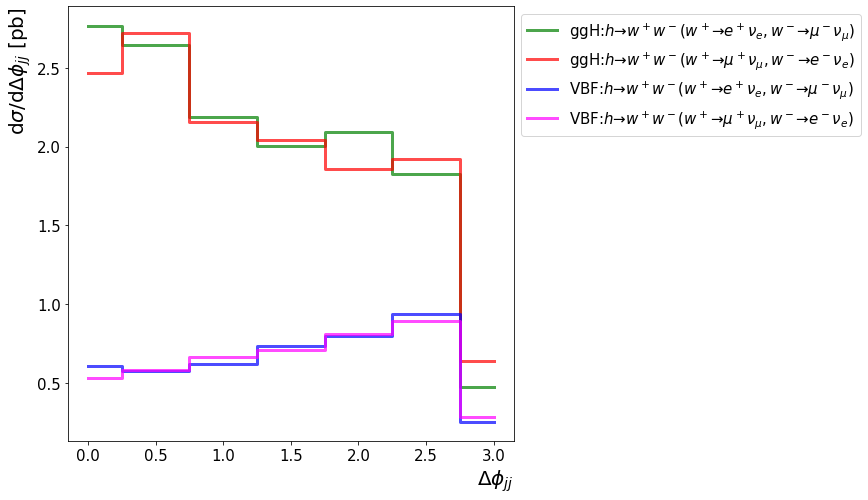

In [282]:
plt.figure(figsize=(8,8)) # plotsize

weight_0 = Event_Weight_0.Event_Weight[survived_list_0]/10000*37*1000
weight_03 = Event_Weight_03.Event_Weight[survived_list_03]/10000*37*1000
weight_05 = Event_Weight_05.Event_Weight[survived_list_05]/10000*37*1000
weight_1 = Event_Weight_1.Event_Weight[survived_list_1]/10000*37*1000

bin_size = np.linspace(0,3.5,8)


hist_0, bins_0 = np.histogram(dPhijj_0, bins=bin_size, weights = weight_0)
plt.step(bins_0[:-1], hist_0.astype(np.float32)/0.5, color = "green", where='mid',linewidth=3, alpha=0.7,label="ggH:$h\\to w^+ w^-(w^+\\to e^+\\nu_e,w^-\\to\\mu^-\\nu_\\mu)$") 

hist_03, bins_03 = np.histogram(dPhijj_03, bins=bin_size, weights = weight_03)
plt.step(bins_03[:-1], hist_03.astype(np.float32)/0.5, color = "red", where='mid',linewidth=3, alpha=0.7,label="ggH:$h\\to w^+ w^-(w^+\\to \mu^+\\nu_\mu,w^-\\to e^-\\nu_e)$") 

hist_05, bins_05 = np.histogram(dPhijj_05, bins=bin_size, weights = weight_05)
plt.step(bins_05[:-1], hist_05.astype(np.float32)/0.5, color = "blue", where='mid',linewidth=3, alpha=0.7,label="VBF:$h\\to w^+ w^-(w^+\\to e^+\\nu_e,w^-\\to\\mu^-\\nu_\\mu)$") 

hist_1, bins_1 = np.histogram(dPhijj_1, bins=bin_size, weights = weight_1)
plt.step(bins_1[:-1], hist_1.astype(np.float32)/0.5, color = "magenta", where='mid',linewidth=3, alpha=0.7,label="VBF:$h\\to w^+ w^-(w^+\\to \\mu^+\\nu_\\mu,w^-\\to e^-\\nu_e)$") 



# plt.yscale('log') 
plt.xlabel("$\Delta \phi_{jj}$" , fontsize=20, horizontalalignment='right',x=1)  # plot x-axis label
plt.ylabel("d$\sigma$/d$\Delta \phi_{jj}$ [pb]", fontsize=20, horizontalalignment='right',y=1)  # plot y-axis label
plt.xticks(fontsize=15)   # set x-ticks size
plt.yticks(fontsize=15)   # set y-ticks size 
plt.legend(bbox_to_anchor=(1, 1),ncol=1,fontsize=15) # plot label tag
# plt.savefig("./invariant_mass_SVJ.png")  #save figure as png
plt.show()

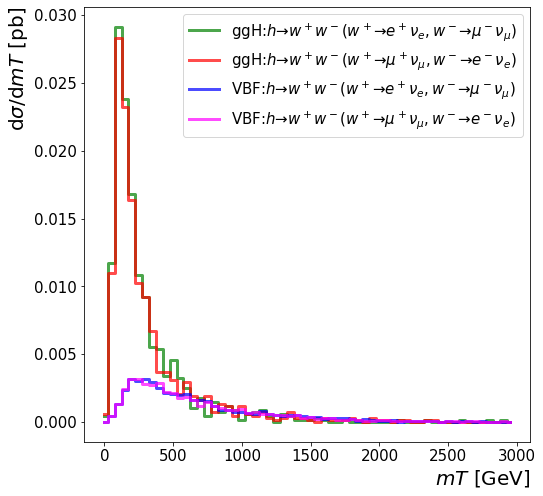

In [283]:
plt.figure(figsize=(8,8)) # plotsize

weight_0 = Event_Weight_0.Event_Weight[survived_list_0]/10000*37*1000
weight_03 = Event_Weight_03.Event_Weight[survived_list_03]/10000*37*1000
weight_05 = Event_Weight_05.Event_Weight[survived_list_05]/10000*37*1000
weight_1 = Event_Weight_1.Event_Weight[survived_list_1]/10000*37*1000

bin_size = np.linspace(0,3000,61)


hist_0, bins_0 = np.histogram(mT_0, bins=bin_size, weights = weight_0)
plt.step(bins_0[:-1], hist_0.astype(np.float32)/50, color = "green", where='mid',linewidth=3, alpha=0.7,label="ggH:$h\\to w^+ w^-(w^+\\to e^+\\nu_e,w^-\\to\\mu^-\\nu_\\mu)$") 

hist_03, bins_03 = np.histogram(mT_03, bins=bin_size, weights = weight_03)
plt.step(bins_03[:-1], hist_03.astype(np.float32)/50, color = "red", where='mid',linewidth=3, alpha=0.7,label="ggH:$h\\to w^+ w^-(w^+\\to \mu^+\\nu_\mu,w^-\\to e^-\\nu_e)$") 

hist_05, bins_05 = np.histogram(mT_05, bins=bin_size, weights = weight_05)
plt.step(bins_05[:-1], hist_05.astype(np.float32)/50, color = "blue", where='mid',linewidth=3, alpha=0.7,label="VBF:$h\\to w^+ w^-(w^+\\to e^+\\nu_e,w^-\\to\\mu^-\\nu_\\mu)$") 

hist_1, bins_1 = np.histogram(mT_1, bins=bin_size, weights = weight_1)
plt.step(bins_1[:-1], hist_1.astype(np.float32)/50, color = "magenta", where='mid',linewidth=3, alpha=0.7,label="VBF:$h\\to w^+ w^-(w^+\\to \\mu^+\\nu_\\mu,w^-\\to e^-\\nu_e)$") 



# plt.yscale('log') 
plt.xlabel("$mT$ [GeV]" , fontsize=20, horizontalalignment='right',x=1)  # plot x-axis label
plt.ylabel("d$\sigma$/d$mT$ [pb]", fontsize=20, horizontalalignment='right',y=1)  # plot y-axis label
plt.xticks(fontsize=15)   # set x-ticks size
plt.yticks(fontsize=15)   # set y-ticks size 
plt.legend(bbox_to_anchor=(1, 1),ncol=1,fontsize=15) # plot label tag
# plt.savefig("./invariant_mass_SVJ.png")  #save figure as png
plt.show()

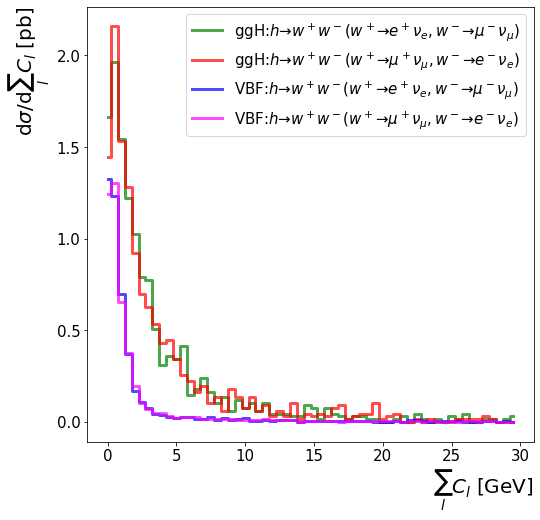

In [284]:
plt.figure(figsize=(8,8)) # plotsize

weight_0 = Event_Weight_0.Event_Weight[survived_list_0]/10000*37*1000
weight_03 = Event_Weight_03.Event_Weight[survived_list_03]/10000*37*1000
weight_05 = Event_Weight_05.Event_Weight[survived_list_05]/10000*37*1000
weight_1 = Event_Weight_1.Event_Weight[survived_list_1]/10000*37*1000

bin_size = np.linspace(0,30,61)


hist_0, bins_0 = np.histogram(sumC_0, bins=bin_size, weights = weight_0)
plt.step(bins_0[:-1], hist_0.astype(np.float32)/0.5, color = "green", where='mid',linewidth=3, alpha=0.7,label="ggH:$h\\to w^+ w^-(w^+\\to e^+\\nu_e,w^-\\to\\mu^-\\nu_\\mu)$") 

hist_03, bins_03 = np.histogram(sumC_03, bins=bin_size, weights = weight_03)
plt.step(bins_03[:-1], hist_03.astype(np.float32)/0.5, color = "red", where='mid',linewidth=3, alpha=0.7,label="ggH:$h\\to w^+ w^-(w^+\\to \mu^+\\nu_\mu,w^-\\to e^-\\nu_e)$") 

hist_05, bins_05 = np.histogram(sumC_05, bins=bin_size, weights = weight_05)
plt.step(bins_05[:-1], hist_05.astype(np.float32)/0.5, color = "blue", where='mid',linewidth=3, alpha=0.7,label="VBF:$h\\to w^+ w^-(w^+\\to e^+\\nu_e,w^-\\to\\mu^-\\nu_\\mu)$") 

hist_1, bins_1 = np.histogram(sumC_1, bins=bin_size, weights = weight_1)
plt.step(bins_1[:-1], hist_1.astype(np.float32)/0.5, color = "magenta", where='mid',linewidth=3, alpha=0.7,label="VBF:$h\\to w^+ w^-(w^+\\to \\mu^+\\nu_\\mu,w^-\\to e^-\\nu_e)$") 



# plt.yscale('log') 
plt.xlabel("$\sum_l C_l$ [GeV]" , fontsize=20, horizontalalignment='right',x=1)  # plot x-axis label
plt.ylabel("d$\sigma$/d$\sum_l C_l$ [pb]", fontsize=20, horizontalalignment='right',y=1)  # plot y-axis label
plt.xticks(fontsize=15)   # set x-ticks size
plt.yticks(fontsize=15)   # set y-ticks size 
plt.legend(bbox_to_anchor=(1, 1),ncol=1,fontsize=15) # plot label tag
# plt.savefig("./invariant_mass_SVJ.png")  #save figure as png
plt.show()

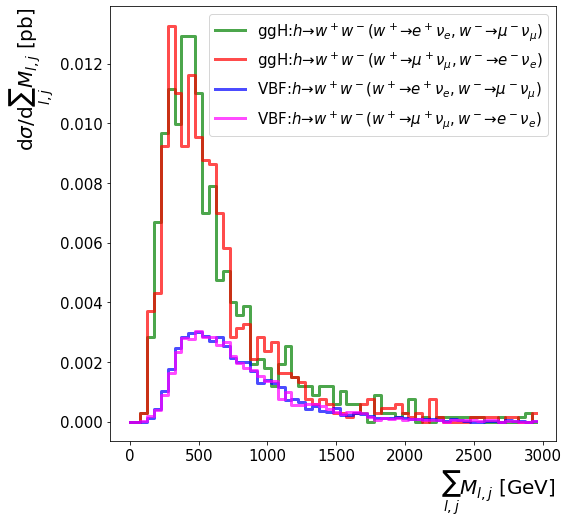

In [285]:
plt.figure(figsize=(8,8)) # plotsize

weight_0 = Event_Weight_0.Event_Weight[survived_list_0]/10000*37*1000
weight_03 = Event_Weight_03.Event_Weight[survived_list_03]/10000*37*1000
weight_05 = Event_Weight_05.Event_Weight[survived_list_05]/10000*37*1000
weight_1 = Event_Weight_1.Event_Weight[survived_list_1]/10000*37*1000

bin_size = np.linspace(0,3000,61)


hist_0, bins_0 = np.histogram(sumM_0, bins=bin_size, weights = weight_0)
plt.step(bins_0[:-1], hist_0.astype(np.float32)/50, color = "green", where='mid',linewidth=3, alpha=0.7,label="ggH:$h\\to w^+ w^-(w^+\\to e^+\\nu_e,w^-\\to\\mu^-\\nu_\\mu)$") 

hist_03, bins_03 = np.histogram(sumM_03, bins=bin_size, weights = weight_03)
plt.step(bins_03[:-1], hist_03.astype(np.float32)/50, color = "red", where='mid',linewidth=3, alpha=0.7,label="ggH:$h\\to w^+ w^-(w^+\\to \mu^+\\nu_\mu,w^-\\to e^-\\nu_e)$") 

hist_05, bins_05 = np.histogram(sumM_05, bins=bin_size, weights = weight_05)
plt.step(bins_05[:-1], hist_05.astype(np.float32)/50, color = "blue", where='mid',linewidth=3, alpha=0.7,label="VBF:$h\\to w^+ w^-(w^+\\to e^+\\nu_e,w^-\\to\\mu^-\\nu_\\mu)$") 

hist_1, bins_1 = np.histogram(sumM_1, bins=bin_size, weights = weight_1)
plt.step(bins_1[:-1], hist_1.astype(np.float32)/50, color = "magenta", where='mid',linewidth=3, alpha=0.7,label="VBF:$h\\to w^+ w^-(w^+\\to \\mu^+\\nu_\\mu,w^-\\to e^-\\nu_e)$") 



# plt.yscale('log') 
plt.xlabel("$\sum_{l,j} M_{l,j}$ [GeV]" , fontsize=20, horizontalalignment='right',x=1)  # plot x-axis label
plt.ylabel("d$\sigma$/d$\sum_{l,j} M_{l,j}$ [pb]", fontsize=20, horizontalalignment='right',y=1)  # plot y-axis label
plt.xticks(fontsize=15)   # set x-ticks size
plt.yticks(fontsize=15)   # set y-ticks size 
plt.legend(bbox_to_anchor=(1, 1),ncol=1,fontsize=15) # plot label tag
# plt.savefig("./invariant_mass_SVJ.png")  #save figure as png
plt.show()

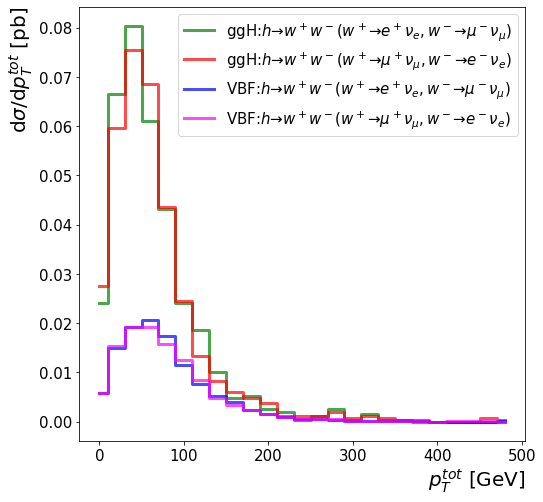

In [286]:
plt.figure(figsize=(8,8)) # plotsize

weight_0 = Event_Weight_0.Event_Weight[survived_list_0]/10000*37*1000
weight_03 = Event_Weight_03.Event_Weight[survived_list_03]/10000*37*1000
weight_05 = Event_Weight_05.Event_Weight[survived_list_05]/10000*37*1000
weight_1 = Event_Weight_1.Event_Weight[survived_list_1]/10000*37*1000

bin_size = np.linspace(0,500,26)


hist_0, bins_0 = np.histogram(pT_tot_0, bins=bin_size, weights = weight_0)
plt.step(bins_0[:-1], hist_0.astype(np.float32)/20, color = "green", where='mid',linewidth=3, alpha=0.7,label="ggH:$h\\to w^+ w^-(w^+\\to e^+\\nu_e,w^-\\to\\mu^-\\nu_\\mu)$") 

hist_03, bins_03 = np.histogram(pT_tot_03, bins=bin_size, weights = weight_03)
plt.step(bins_03[:-1], hist_03.astype(np.float32)/20, color = "red", where='mid',linewidth=3, alpha=0.7,label="ggH:$h\\to w^+ w^-(w^+\\to \mu^+\\nu_\mu,w^-\\to e^-\\nu_e)$") 

hist_05, bins_05 = np.histogram(pT_tot_05, bins=bin_size, weights = weight_05)
plt.step(bins_05[:-1], hist_05.astype(np.float32)/20, color = "blue", where='mid',linewidth=3, alpha=0.7,label="VBF:$h\\to w^+ w^-(w^+\\to e^+\\nu_e,w^-\\to\\mu^-\\nu_\\mu)$") 

hist_1, bins_1 = np.histogram(pT_tot_1, bins=bin_size, weights = weight_1)
plt.step(bins_1[:-1], hist_1.astype(np.float32)/20, color = "magenta", where='mid',linewidth=3, alpha=0.7,label="VBF:$h\\to w^+ w^-(w^+\\to \\mu^+\\nu_\\mu,w^-\\to e^-\\nu_e)$") 



# plt.yscale('log') 
plt.xlabel("$p_T^{tot}$ [GeV]" , fontsize=20, horizontalalignment='right',x=1)  # plot x-axis label
plt.ylabel("d$\sigma$/d$p_T^{tot}$ [pb]", fontsize=20, horizontalalignment='right',y=1)  # plot y-axis label
plt.xticks(fontsize=15)   # set x-ticks size
plt.yticks(fontsize=15)   # set y-ticks size 
plt.legend(bbox_to_anchor=(1, 1),ncol=1,fontsize=15) # plot label tag
# plt.savefig("./invariant_mass_SVJ.png")  #save figure as png
plt.show()